In [2]:
# Mount into drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/DL7643_Group_project/'
# Verify the contents of the current folder
!ls

/content/drive/MyDrive/DL7643_Group_project
 CSV_Log			        no_text_100.zip
 deepfill2_3.28.zip		        no_text_30
'deepfill2_3.28.zip (Unzipped Files)'   no_text_30.zip
 defaults.yaml			        no_text_50
 Generate_data.ipynb		        no_text_50.zip
 hateful_memes.zip		        no_text_70
'hateful_memes.zip (Unzipped Files)'    no_text_70.zip
'list of models.gdoc'		       'Project Plan.gdoc'
 memes900k.zip			        remove_text
 memotion_dataset_7k.zip	        Results.gsheet
 no_text_100			        vilbert


In [12]:
infile = r"CSV_Log/visual_bert_coco_3_log.log"
Model = "VisualBERT COCO"
best_i = 2000

# infile = r"CSV_Log/vilbert_13_log.log"
# Model = "ViLBERT"
# best_i = 9000

# infile = r"CSV_Log/vilbert_cc_1_log.log"
# Model = "ViLBERT CC"
# best_i = 14000

# infile = r"CSV_Log/visual_bert_2.log"
# Model = "VisualBERT"
# best_i = 2000

# infile = r"CSV_Log/mmbt_1.log"
# Model = "MMBT"
# best_i = 8000

train_important = []
train_keep_phrases = ["train/total_loss/avg"]

val_important = []
val_keep_phrases = ["val/total_loss"]

with open(infile) as f:
    f = f.readlines()

# i = 0
for line in f:
  # if i>17939:
    for phrase in train_keep_phrases:
        if phrase in line:
            train_important.append(line)
            break
    for phrase in val_keep_phrases:
        if phrase in line:
            val_important.append(line)
            break
  # i = i+1

In [13]:
# val_important

In [14]:
train_progress = []
train_total_loss_avg= []
val_progress = []
val_total_loss_avg= []


for i, item in enumerate(train_important):
  # print("-----",i,"-------")
  # print(item)
  train_progress.append(int(item.split("progress: ",1)[1].split("/")[0]))
  train_total_loss_avg.append(float(item.split("train/total_loss/avg: ",1)[1].split(",")[0]))
  # train_total_loss_avg.append(float(item.split("train/total_loss: ",1)[1].split(",")[0]))
for i, item in enumerate(val_important[:-1]):
  # print("-----",i,"-------")
  # print(item)
  # if "progress" not in item:
  #   break
  val_progress.append(int(item.split("progress: ",1)[1].split("/")[0]))
  val_total_loss_avg.append(float(item.split("val/total_loss: ",1)[1].split(",")[0]))


In [15]:
# val_total_loss_avg

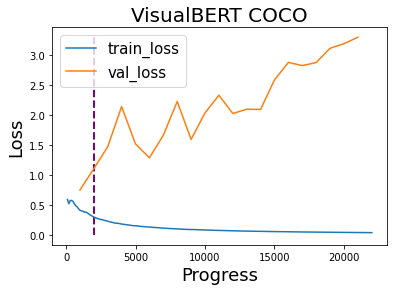

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(train_progress, train_total_loss_avg,label = "train_loss")
plt.plot(val_progress, val_total_loss_avg,label = "val_loss")
plt.legend(prop={'size': 15})
plt.vlines(x=best_i,ymin=0, ymax=max(val_total_loss_avg),colors='purple', ls='--', lw=2)
plt.title(Model, fontsize=20)
plt.xlabel('Progress', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(fontsize= )
plt.show()

plt.savefig(Model+'.png')

In [9]:
len(train_progress)

220

# Accuracy, ROC

In [ ]:
infile = r"save/train.log"

important = []
keep_phrases = ["val/hateful_memes/accuracy"]

with open(infile) as f:
    f = f.readlines()

for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            important.append(line)
            break

print(important)

FileNotFoundError: ignored

In [ ]:
len(important)

0

In [ ]:
important[-1]

IndexError: ignored

In [ ]:
progress = []
val_accuracy = []
val_roc_auc = []
val_f1 = []
best_val_roc_auc = []

for i, item in enumerate(important[:-1]):
  # print("-----",i,"-------")
  # print(item)
  progress.append(int(item.split("progress: ",1)[1].split("/")[0]))
  val_accuracy.append(float(item.split("val/hateful_memes/accuracy: ",1)[1].split(",")[0]))
  val_roc_auc.append(float(item.split("val/hateful_memes/roc_auc: ",1)[1].split(",")[0]))
  val_f1.append(float(item.split("val/hateful_memes/binary_f1: ",1)[1].split(",")[0]))
  best_val_roc_auc.append(float(item.split("best_val/hateful_memes/roc_auc: ",1)[1].split("\n")[0]))

In [ ]:
# best_val_roc_auc

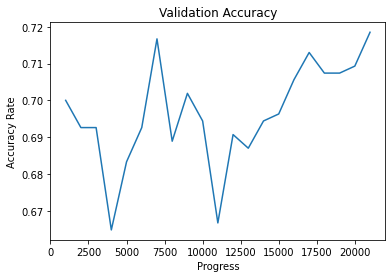

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(progress, val_accuracy)

plt.title('Validation Accuracy')
plt.xlabel('Progress')
plt.ylabel('Accuracy Rate')
plt.show()

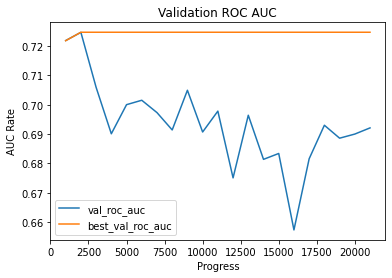

In [ ]:
plt.clf()
plt.plot(progress, val_roc_auc, label = "val_roc_auc")
plt.plot(progress, best_val_roc_auc, label = "best_val_roc_auc")
plt.legend()
plt.title('Validation ROC AUC')
plt.xlabel('Progress')
plt.ylabel('AUC Rate')
plt.show()

In [ ]:
import numpy as np

print(progress[np.argmax(val_roc_auc)])
print(val_roc_auc[np.argmax(val_roc_auc)])
print(val_f1[np.argmax(val_roc_auc)])
print(val_accuracy[np.argmax(val_roc_auc)])

2000
0.7246
0.497
0.6926
